<a href="https://colab.research.google.com/github/kyle-cech/Homework_7/blob/main/Homework7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
iris_x, iris_y = datasets.load_iris(return_X_y=True) #load in iris data
wine_x, wine_y = datasets.load_wine(return_X_y=True) #load in wine data

confusion matrix: [[14  0]
 [ 0 31]] 
accuracy: 1.0 
precision: 1.0 
recall: 1.0 
F1-score: 1.0 
AUC: 1.0


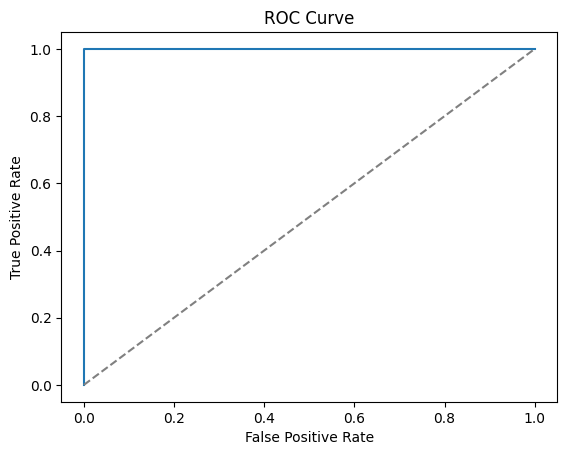

In [2]:
iris_y[iris_y > 1] = 1 #make iris y values binary, either setosa or not setosa
train_x, test_x, train_y, test_y = train_test_split(iris_x, iris_y, test_size = .3, random_state=39) #split into 70% train and 30% test
mod = LogisticRegression() #make logistic regression model
mod.fit(train_x, train_y) #fit model with train data
pred = mod.predict(test_x) #make predictions from test x values
cf = metrics.confusion_matrix(test_y, pred) #create confusion matrix from actual and predicted values
tp = cf[0][0] #calculate true positive
fp = cf[1][0] #calculate false positive
tn = cf[1][1] #calculate true negative
fn = cf[0][1] #calculate false negative
acc = (tp + tn) / (tp + tn + fp +fn) #find accuracy
prec = tp / (tp + fp) #calculate precision
rec = tp / (tp + fn) #calculate recall
f1 = 2 * (prec * rec) / (prec + rec) #get f1 score
fpr, tpr, thresholds = roc_curve(test_y, pred) #get false positive and true positive rates for roc curve
auc_score = roc_auc_score(test_y, pred) #calculate area under roc curve
plt.plot(fpr, tpr) #plot roc curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('confusion matrix:', cf, '\naccuracy:', acc, '\nprecision:', prec, '\nrecall:', rec, '\nF1-score:', f1, '\nAUC:', auc_score)

In [3]:
"""
This ROC curve shows that the true positive rate is always 1 with this model, meaning it predicted 100% of the flowers correctly. It does not
depend on the false positive rate, since it is at 1 for every false positive rate value. This graph, along with the metrics calculated from the
confusion matrix, show that the model is very accurate at predicting whether an iris flower is setosa or not.
"""

'\nThis ROC curve shows that the true positive rate is always 1 with this model, meaning it predicted 100% of the flowers correctly. It does not \ndepend on the false positive rate, since it is at 1 for every false positive rate value. This graph, along with the metrics calculated from the \nconfusion matrix, show that the model is very accurate at predicting whether an iris flower is setosa or not.\n'

In [4]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, random_state = 13) #split data into 75% train and 25% test for wine data
lin = SVC(kernel = 'linear') #make linear model
rbf = SVC(kernel = 'rbf') #make RBF model
poly = SVC(kernel = 'poly') #make polynomial model
lin.fit(x_train, y_train) #fit linear model
rbf.fit(x_train, y_train) #fit RBF model
poly.fit(x_train, y_train) #fit polynomial model
lin_y = lin.predict(x_test) #predict linear model values
rbf_y = rbf.predict(x_test) #predict RBF model values
poly_y = poly.predict(x_test) #predict polynomial model values
scores = {'Linear' : {}, 'RBF' : {}, 'Polynomial': {}} #make empty dictionary for the 3 model scores
for i in [lin_y, rbf_y, poly_y]: #loop over all model predicted values and repeat process from iris model, create a confusion matrix and
#calculate accuracy, precision, recall, and F1-score and add to score dictionary
  con_mat = metrics.confusion_matrix(y_test, i)
  tp = con_mat[0][0]
  fp = con_mat[1][0]
  tn = con_mat[1][1]
  fn = con_mat[0][1]
  acc = (tp + tn) / (tp + tn + fp +fn)
  prec = tp / (tp + fp)
  rec = tp / (tp + fn)
  f1 = 2 * (prec * rec) / (prec + rec)
  if scores['Linear'] == {}:
    scores['Linear']['Accuracy'] = acc
    scores['Linear']['Precision'] = prec
    scores['Linear']['Recall'] = rec
    scores['Linear']['F1-score'] = f1
  elif scores['RBF'] == {}:
    scores['RBF']['Accuracy'] = acc
    scores['RBF']['Precision'] = prec
    scores['RBF']['Recall'] = rec
    scores['RBF']['F1-score'] = f1
  elif scores['Polynomial'] == {}:
    scores['Polynomial']['Accuracy'] = acc
    scores['Polynomial']['Precision'] = prec
    scores['Polynomial']['Recall'] = rec
    scores['Polynomial']['F1-score'] = f1
scores

{'Linear': {'Accuracy': np.float64(0.9393939393939394),
  'Precision': np.float64(0.875),
  'Recall': np.float64(1.0),
  'F1-score': np.float64(0.9333333333333333)},
 'RBF': {'Accuracy': np.float64(0.9655172413793104),
  'Precision': np.float64(0.9285714285714286),
  'Recall': np.float64(1.0),
  'F1-score': np.float64(0.962962962962963)},
 'Polynomial': {'Accuracy': np.float64(0.9655172413793104),
  'Precision': np.float64(0.9230769230769231),
  'Recall': np.float64(1.0),
  'F1-score': np.float64(0.9600000000000001)}}

In [5]:
"""
The linear, RBF, and polynomial models all resulted in high F-1 scores and a recall of 1, showing good model performance at predicting the wine region.
However, the linear model had the lowest F-1 score, accuracy, and recall, making it the poorest model out of the 3.
The RBF model and polynomial model gave nearly identical F1-scores of .962 and .96, respectively, and the same accuracy of .966.
The precisions were also very similar, with RBF only having a precision that was higher by about .005. Given this, the RBF model would be the best choice,
also given that polynomial models can sometimes have complex equations that are prone to overfitting, but both models would give extremely similar
results when predicting what region the wine is from.
"""

'\nThe linear, RBF, and polynomial models all resulted in high F-1 scores and a recall of 1, showing good model performance at predicting the wine region. \nHowever, the linear model had the lowest F-1 score, accuracy, and recall, making it the poorest model out of the 3. \nThe RBF model and polynomial model gave nearly identical F1-scores of .962 and .96, respectively, and the same accuracy of .966. \nThe precisions were also very similar, with RBF only having a precision that was higher by about .005. Given this, the RBF model would be the best choice, \nalso given that polynomial models can sometimes have complex equations that are prone to overfitting, but both models would give extremely similar \nresults when predicting what region the wine is from. \n'